In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
mne.set_log_level('WARNING')
from tqdm import tqdm
import os
from sklearn.feature_selection import RFECV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
metric="f1"
root_path=r'E:\ZKP\persons comparision\Band Analysis\Epoch\Epoch_Super'
bands=['delta','theta','alpha','beta','gamma',"all"]
drug_path_before=os.path.join(root_path,'drug_before')
drug_path_before_s2=os.path.join(root_path,'drug_before_s2')
health_path=os.path.join(root_path,'health')
health_path_s2=os.path.join(root_path,'health_s2')
drug_path_after=os.path.join(root_path,'drug_after')
drug_path_after_s2=os.path.join(root_path,'drug_after_s2')


In [3]:
band="gamma"
path_1=drug_path_before
path_2=health_path
drug_data=pd.read_excel(os.path.join(path_1,band+'.xlsx')).iloc[:,:-1]
health_data=pd.read_excel(os.path.join(path_2,band+'.xlsx')).iloc[:,:-1]

X=np.concatenate((drug_data.values,health_data.values),axis=0)
X=X[:,:-7]

y=np.concatenate((np.ones(drug_data.shape[0]),np.zeros(health_data.shape[0])),axis=0)

feature_name=drug_data.columns[:].tolist()
feature_name=feature_name[:-7]

In [4]:


from sklearn.model_selection import StratifiedKFold


kfold = StratifiedKFold(n_splits=5, shuffle=True)
feature_importance_dict=dict()

for train_indices, test_indices in kfold.split(X, y):
    clf=RandomForestClassifier(random_state=20)
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    clf.fit(X_train, y_train)


    # get feature importance, and plot in order
    mdi_importances = pd.Series(
        clf.feature_importances_, index=feature_name)

    feature_importance_dict['Fold {}'.format(len(feature_importance_dict)+1)] = mdi_importances
    
total_importance = pd.DataFrame(feature_importance_dict).T


In [5]:
total_importance_sorted=total_importance.mean(axis=0).sort_values(ascending=False).index
total_importance_sorted=total_importance_sorted[:10]

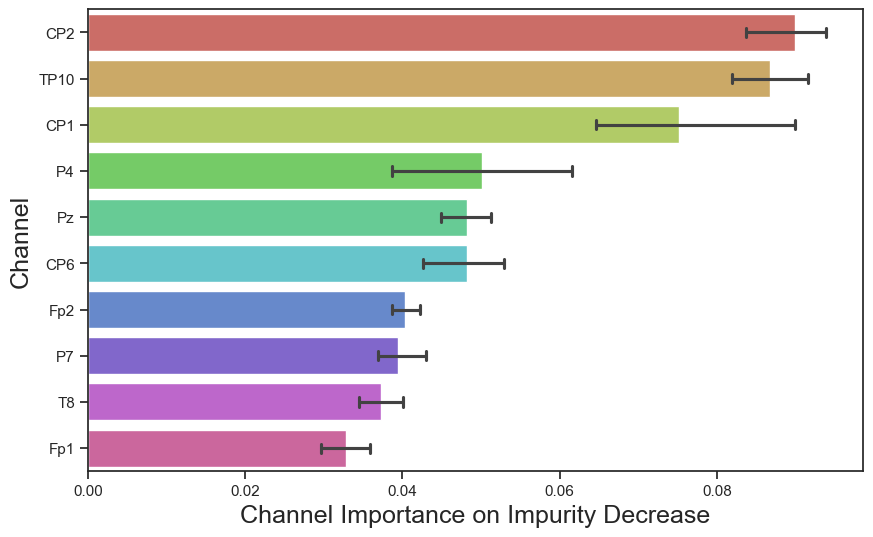

In [6]:
sns.set(style="ticks")
plt.figure(figsize=(10, 6))
plt.ylabel("Channel",fontsize=18)
plt.xlabel("Mean Decrease in Impurity",fontsize=18)
sns.barplot(data=total_importance.loc[:,total_importance_sorted],orient="h",errorbar=('ci', 95),capsize=.2,palette="hls")
plt.show()